In [2]:
#!pip install ucimlrepo

<h1><b> Importing Data</b> </h1>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
# fetch dataset 
census_income = fetch_ucirepo(id=20) 


In [5]:
df = pd.DataFrame(census_income.data.original)

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<b><h1> Data Cleaning</h1></b> 

**Removing whitespaces from object type columns**

In [7]:
#strip string columns

for col in census_income.data.original.columns:
    if df[col].dtype in ['O']:
        df[col]=df[col].str.strip()

In [8]:
#Check for Data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<b><h1> Handle missing data </h1></b>

In [9]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

**`?` It expresses as missing data. so chaning `?` to `NaN`**

In [10]:
#changing '?' to NaN
df.replace("?", np.NaN, inplace=True)

In [11]:
#checking for missing values
data_na = df.isna().sum()
data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)


occupation        2809
workclass         2799
native-country     857
dtype: int64

In [12]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [13]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

**There are 2799 rows in the `Occupation` column and the `Workclass` that are missing. But `Occupation` column has 10 missing data more becouse the person doesn't work.**

**So we replace these data with `No-occupation`**

In [14]:
df[df['workclass']=='Never-worked']= df[df['workclass']=='Never-worked'].fillna('No-occupation')


In [15]:
data_na = df.isna().sum()
data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)

workclass         2799
occupation        2799
native-country     857
dtype: int64

**The `workclas` column and the `occupation` column both contain `2799` Null values**

In [16]:
df['native-country'].value_counts()[:5]

United-States    43832
Mexico             951
Philippines        295
Germany            206
Puerto-Rico        184
Name: native-country, dtype: int64

**As you can see `90%` of the data in the `"native country"` column consists of `"United States"`, it may be appropriate to fill the null values in that column with `"United States"` to maintain data consistency.**

In [17]:
df['native-country'].fillna('United-States', inplace=True)

In [18]:
# checking the missing values
data_na = df.isna().sum()
data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)

workclass     2799
occupation    2799
dtype: int64

**Droping the Null values**

In [19]:
df.dropna(inplace=True)

**`Capital Gain & loss Columns`**

In [20]:
len1, len2 = len(df[df['capital-gain']== 0])/len(df), len(df[df['capital-loss']== 0])/len(df)

print(round(len1,2),'%', round(len2,2),'%')

0.92 % 0.95 %


**Most of `90%` of Capital Gain and loss columns equal `0`.These columns may be difficult to model. Machine learning models often have difficulty learning from these columns and make the model less accurate.**

In [21]:
# Droping the Capital-gain and Capital-loss columns
df.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

In [22]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


**Checking the income column**

In [23]:
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

**Income column has some value with `.` let's correct that**

In [24]:
df.replace({'income':{">50K.":">50K" , "<=50K.":"<=50K"}},inplace=True)

In [25]:
(df['native-country'].value_counts()/len(df))[:5]

United-States    0.914645
Mexico           0.019612
Philippines      0.006146
Germany          0.004192
Puerto-Rico      0.003801
Name: native-country, dtype: float64

**Most of `90%` of the `Native Country` is  `United-States`. That make our model less accurate and misleading.**

**let's drop this column**

In [26]:
df.drop(columns='native-country', inplace=True)

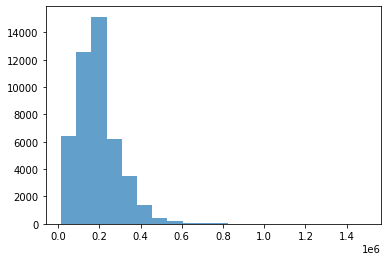

In [27]:
plt.hist(df['fnlwgt'], bins=20, alpha=0.7)

plt.show()


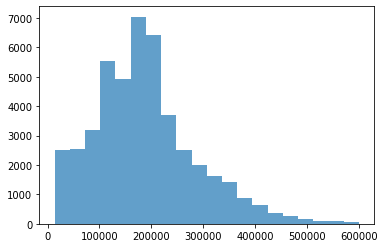

In [28]:

mask = df['fnlwgt'] > 0.6*1000000

# Replace the values that satisfy the mask with the mean value
df.loc[mask, 'fnlwgt'] = np.ceil(df['fnlwgt'].mean())
plt.hist(df['fnlwgt'], bins=20, alpha=0.7);

# Visualization


In [29]:
def add_value_labels(ax, spacing=5):

    # For each bar: Place a label    
    for rect in ax.patches:
        
        # Get X and Y placement of label from rect.
        x = rect.get_x() + rect.get_width() / 2
        y = rect.get_height()-4

        # Determine vertical alignment for positive and negative values
        va = 'bottom' if y >= 0 else 'top'

        # Format the label to one decimal place
        label = int(y)    #"{}".format(y)

        # Determine the vertical shift of the label
        # based on the sign of the y value and the spacing parameter
        y_shift = spacing * (1 if y >= 0 else -1)

        # Create the annotation
        ax.annotate(label, (x, y), xytext=(0, y_shift),
                    textcoords="offset points", ha='center', va=va)
        
pal = ['#93bac2','#adc293','#c29793', '#E28F6B', '#76A15A', '#838477' ]

def r_color(num=1, seed=None):

    if seed == None:
        seed = np.random.randint(0, 420, size=1)
        np.random.seed(seed)

    colors = np.random.choice(pal, num, replace=False)

    # Return the colors
    return list(colors)

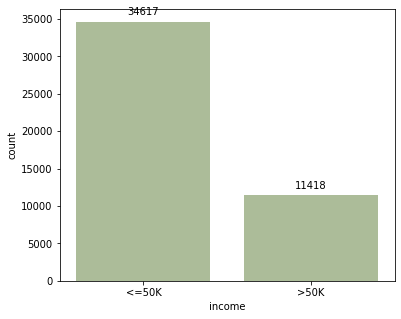

In [30]:
Workclass_data=df['income'].value_counts()
order= list(Workclass_data.index)

plt.figure(figsize=(6,5))
plot= sns.countplot(data=df, x='income', order=order, palette = r_color(num=1))
add_value_labels(plot)

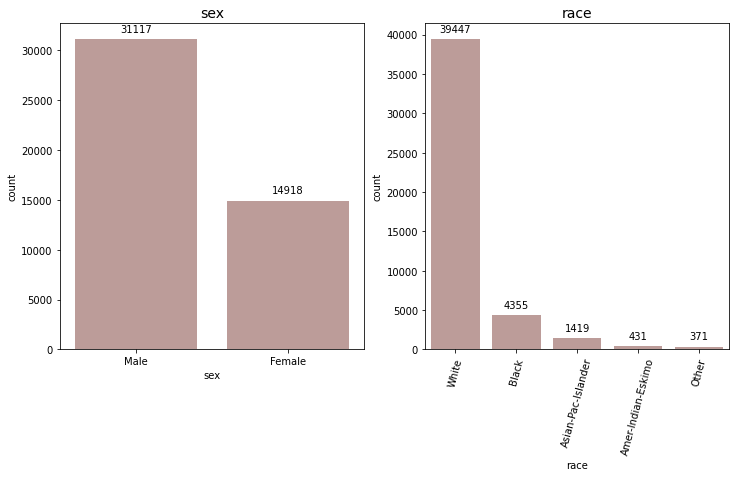

In [31]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('sex', size=14)
plot=sns.countplot(data=df, x='sex', palette = r_color(num=1,seed=0))
add_value_labels(plot)

plt.subplot(1,2,2)
plt.title('race', size=14)
plot=sns.countplot(data=df, x='race', palette = r_color(num=1, seed=2))
plt.xticks(rotation=75)
add_value_labels(plot)

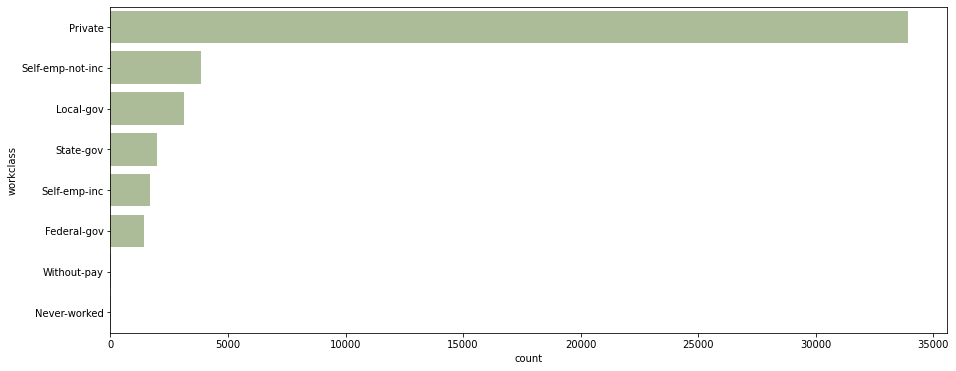

In [32]:
Workclass_data=df['workclass'].value_counts()
order= list(Workclass_data.index)

plt.figure(figsize=(15,6))
plot= sns.countplot(data=df, y='workclass', orient="h", order=order,  palette = r_color(num=1))


* **The majority of people in the census dataset have jobs in the private sector. This suggests that the private sector is the largest employer in the economy.**
* **Self-employment is also relatively common, with over 6,000 people in the dataset classified as Self-emp-not-inc or Self-emp-inc. This suggests that there is a significant number of people who are starting their own businesses or working for themselves.**
* **Government jobs are less common, but still represent a significant portion of the workforce.**

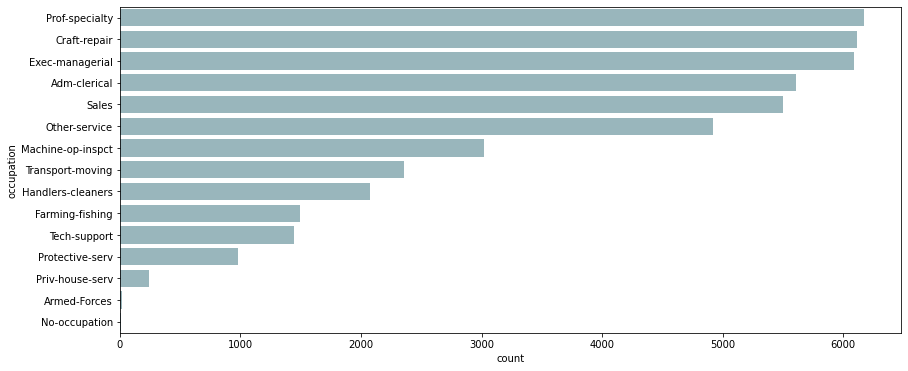

In [33]:
Occupation_data=df['occupation'].value_counts()
order= list(Occupation_data.index)

plt.figure(figsize=(14,6))
plot= sns.countplot(data=df, y='occupation', orient="h", order=order, palette = r_color(num=1,seed=0))

In [34]:
Relationship_data=df['relationship'].value_counts()

order= list(Relationship_data.index)
values = list(Relationship_data.values)

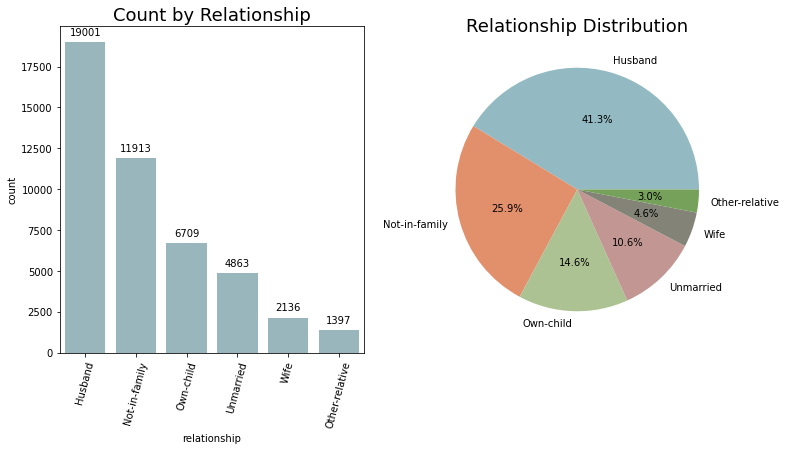

In [35]:
plt.figure(figsize=(12,6))

# Plot the count bar plot
plt.subplot(1,2,1)
plot1= sns.countplot(data=df, x='relationship', order=order, palette = r_color(num=1,seed=0))
plt.title('Count by Relationship', fontsize=18)
plt.xticks(rotation=75)
add_value_labels(plot1);

plt.subplot(1,2,2)
plt.pie(values, labels=order, autopct='%1.1f%%', colors= r_color(num=6,seed=0))
plt.title('Relationship Distribution', fontsize=18);

In [36]:
Education_data=df['education'].value_counts()
order1= list(Education_data.index)

EducationNum_data=df['education-num'].value_counts()
order2= list(EducationNum_data.index)

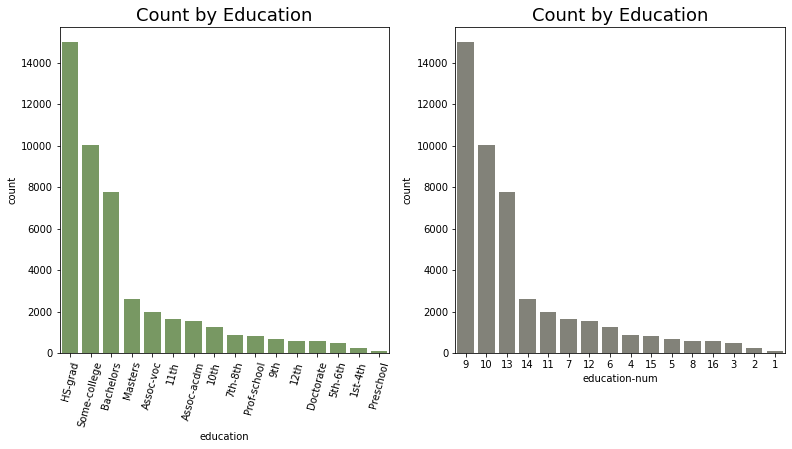

In [37]:
plt.figure(figsize=(13,6))

# Plot the count bar plot
plt.subplot(1,2,1)
plot1= sns.countplot(data=df, x='education', order=order1, palette = r_color(num=1,seed=0))
plt.title('Count by Education', fontsize=18)
plt.xticks(rotation=75);

plt.subplot(1,2,2)
plot2= sns.countplot(data=df, x='education-num', order=order2, palette = r_color(num=1,seed=42))
plt.title('Count by Education', fontsize=18);

**You can notice that the `Education` column related with `EducationNum` column 
Where:**
* **HS-grad = 9 years of education completed.**
* **Some-college = 10**
* **Bachelors = 13**
* **Masters = 14**
* **Assoc-voc = 11   And So On..**

We will drop `Education` column.

In [38]:
df.drop(columns='education', inplace=True)

In [39]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K


# **Data encoding**

In [40]:
ohe_cols = [col for col in df.columns if 42 >= df[col].nunique() > 2]
ohe_cols

['workclass',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race']

In [43]:
from sklearn.preprocessing import LabelEncoder

# label encoder

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in ['income', 'sex']:
    df = label_encoder(df, col)

**One hot encoding**

In [45]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    encoded_data = dataframe.copy()  # Make a copy of the original DataFrame
    
    for col in categorical_cols:
        dumm = pd.get_dummies(dataframe[col], prefix=col, dtype=int, drop_first=drop_first)
        del encoded_data[col]
        encoded_data = pd.concat([encoded_data, dumm], axis=1)
    
    return encoded_data

df = one_hot_encoder(df, ['workclass', 'marital-status', 'occupation', 'relationship', 'race'])

In [46]:
df.shape

(46043, 42)

In [47]:
df.head()

,age,fnlwgt,education-num,sex,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,77516,13,1,40,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,50,83311,13,1,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,1,40,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,53,234721,7,1,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


# **Building model**

In [49]:
from sklearn.model_selection import train_test_split
# split the data set for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


**Define models**

In [50]:
# prompt: import random forest and train model with these values X_train, X_test, y_train, y_test and print the classification report

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6961
           1       0.77      0.40      0.52      2248

    accuracy                           0.82      9209
   macro avg       0.80      0.68      0.71      9209
weighted avg       0.82      0.82      0.80      9209



In [51]:
# prompt: import naive bayes and train model with X_train, X_test, y_train, y_test  and print the accuracy

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.79      0.97      0.87      6961
           1       0.69      0.19      0.30      2248

    accuracy                           0.78      9209
   macro avg       0.74      0.58      0.58      9209
weighted avg       0.76      0.78      0.73      9209



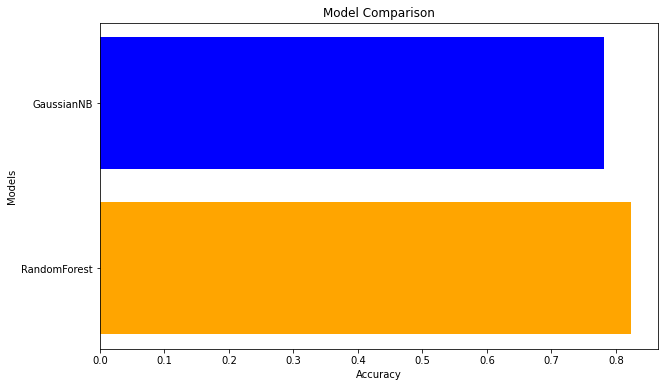

Model: RandomForest, Accuracy: 0.8237593658377674
Model: GaussianNB, Accuracy: 0.7815180801389945


In [56]:
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color=['orange', 'blue'])
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Model Comparison')
plt.show()

for i in range(len(models)):
    print(f"Model: {models[i]}, Accuracy: {accuracies[i]}")